In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from functions import *
from extrafunctions import *

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.rename(columns={'default': 'credit'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   credit          41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [7]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [8]:
def month_name_to_number(month_name):
    return datetime.datetime.strptime(month_name, '%b').month

In [9]:
df['month'] = df['month'].apply(month_name_to_number)

In [10]:
day_name_to_number = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5
}

In [11]:
df['day_of_week'] = df['day_of_week'].map(day_name_to_number)

In [12]:
df.dtypes

age                 int64
job                object
marital            object
education          object
credit             object
housing            object
loan               object
contact            object
month               int64
day_of_week         int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
df.describe()

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.607896,2.979581,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.040998,1.411514,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,3.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,5.000000,2.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,6.000000,3.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,8.000000,4.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,12.000000,5.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


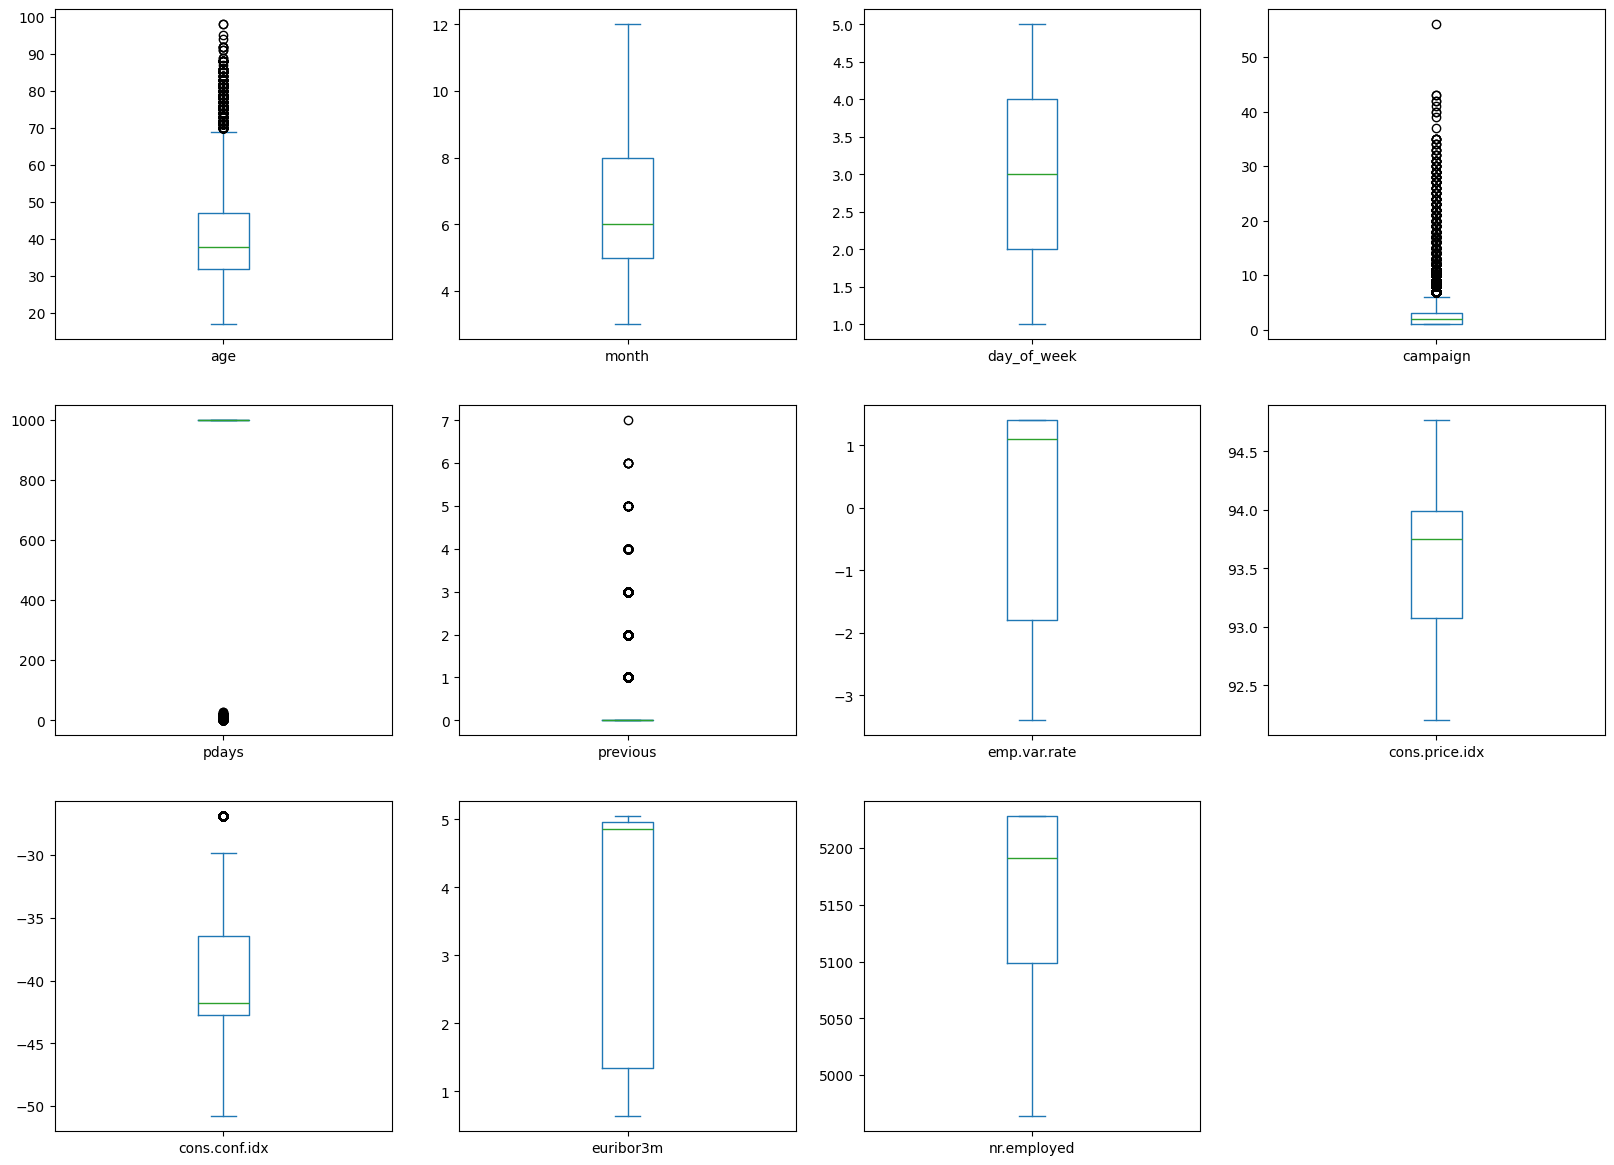

In [14]:
boxPlotAll(df)

In [15]:
df.y.value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

**Feature Engineering**

In [16]:
numerical_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype != object:
        numerical_features.append(column)
    else:
        categorical_features.append(column)
categorical_features.pop(-1)
print(numerical_features)
print(categorical_features)

['age', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'credit', 'housing', 'loan', 'contact', 'poutcome']


In [17]:
# back up df which hasn't been one-hot encoded
df_back_up = df

One-hot encode categorical features

In [18]:
# convert categories into numerical columns with one-hot encoding
for feature in categorical_features:
    category_columns = pd.get_dummies(df[feature])
    category_columns.columns = [feature + '_' + str(col) for col in category_columns.columns]
    #category_columns = category_columns.drop(category_columns.columns[-1], axis=1) # drop the last dummy variable
    df = df.join(category_columns)
    df = df.drop(feature, axis=1)
df.head()

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,credit_no,credit_unknown,credit_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False
1,57,5,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False
2,37,5,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,True,False
3,40,5,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False
4,56,5,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False


In [19]:
df.shape

(41188, 50)

In [20]:
basic_categories_list = []
finance_categories_list = []

df_numeric = df[numerical_features]
for col in df.columns:
    if (col.find('job') == 0) | (col.find('marital') == 0) | (col.find('education') == 0):
        basic_categories_list.append(col)
    elif (col.find('credit') == 0) | (col.find('housing') == 0) | (col.find('loan') == 0):
        finance_categories_list.append(col)

print(basic_categories_list)
print(finance_categories_list)

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown']
['credit_no', 'credit_unknown', 'credit_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes']


# **Exploratory Analysis**

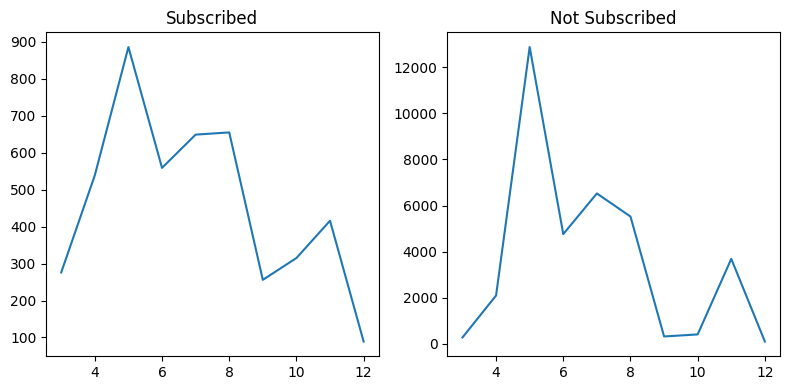

In [53]:
df_monthly_subscribe = df[df['y'] == 'yes'].groupby(['month'])['y'].count()
df_monthly_unsubscribe = df[df['y'] == 'no'].groupby(['month'])['y'].count()
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(df_monthly_subscribe)
ax1.set_title('Subscribed')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(df_monthly_unsubscribe)
ax2.set_title('Not Subscribed')
fig.tight_layout()
plt.show()

<Axes: xlabel='day_of_week'>

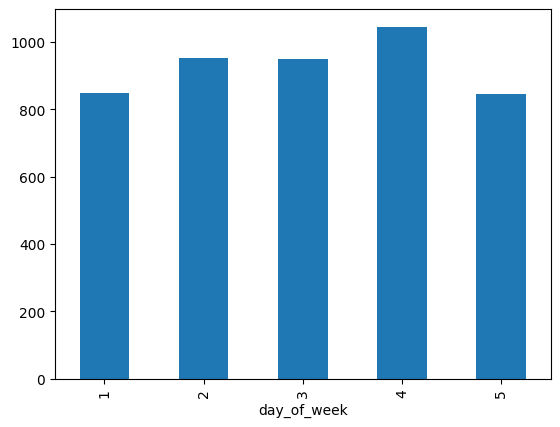

In [26]:
df_dayofweek_subscribe = df_back_up[df_back_up['y'] == 'yes'].groupby(['day_of_week'])['y'].count()
df_dayofweek_subscribe.plot.bar()

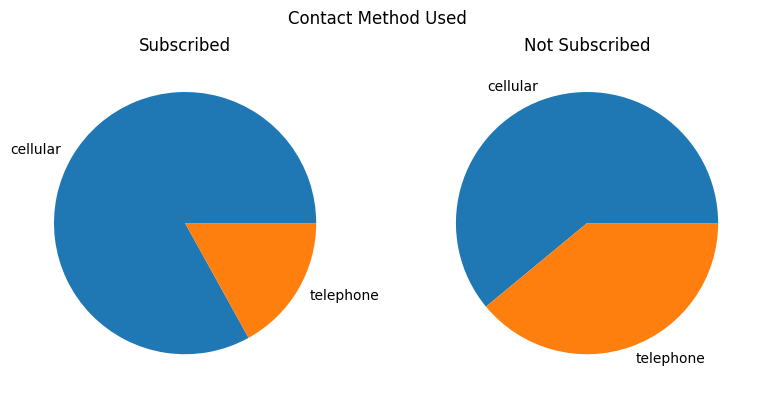

In [56]:
df_contact_subscribe = df_back_up[df_back_up['y'] == 'yes'].groupby(['contact'])['y'].count()
df_contact_unsubscribe = df_back_up[df_back_up['y'] == 'no'].groupby(['contact'])['y'].count()
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(df_contact_subscribe, labels=df_contact_subscribe.index)
ax1.set_title('Subscribed')
ax2 = fig.add_subplot(1, 2, 2)
ax2.pie(df_contact_unsubscribe, labels=df_contact_unsubscribe.index)
ax2.set_title('Not Subscribed')
fig.suptitle('Contact Method Used')
fig.tight_layout()
plt.show()

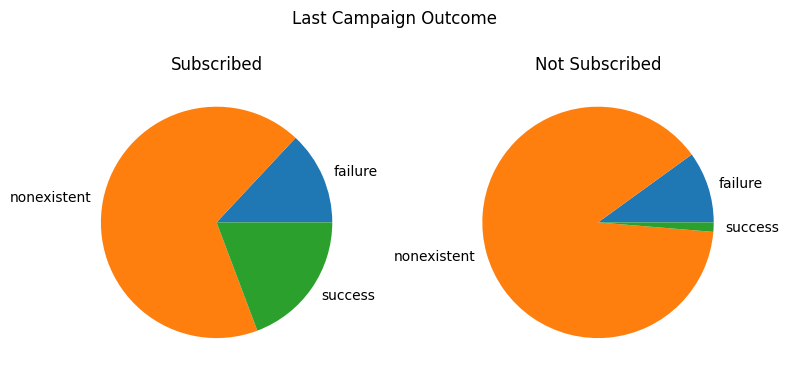

In [55]:
df_poutcome_subscribe = df_back_up[df_back_up['y'] == 'yes'].groupby(['poutcome'])['y'].count()
df_poutcome_unsubscribe = df_back_up[df_back_up['y'] == 'no'].groupby(['poutcome'])['y'].count()
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(df_poutcome_subscribe, labels=df_poutcome_subscribe.index)
ax1.set_title('Subscribed')
ax2 = fig.add_subplot(1, 2, 2)
ax2.pie(df_poutcome_unsubscribe, labels=df_poutcome_unsubscribe.index)
ax2.set_title('Not Subscribed')
fig.suptitle('Last Campaign Outcome')
fig.tight_layout()
plt.show()

# **Similarity Analysis**
<br>find potential customers with similar characteristics with subscribed customers

In [46]:
df_subscribed = df[df.y == 'yes'].reset_index(drop=True)
df_not_subscribed = df[df.y == 'no'].reset_index(drop=True)
print('Subscribed customers: ', df_subscribed.shape[0])
print('Unsubscribed customer: ', df_not_subscribed.shape[0])

Subscribed customers:  4640
Unsubscribed customer:  36548


**find clusters of subscribed customer (based on numerical features only)**

In [47]:
from sklearn.cluster import KMeans
X = df_subscribed[numerical_features]
random_seed = 1

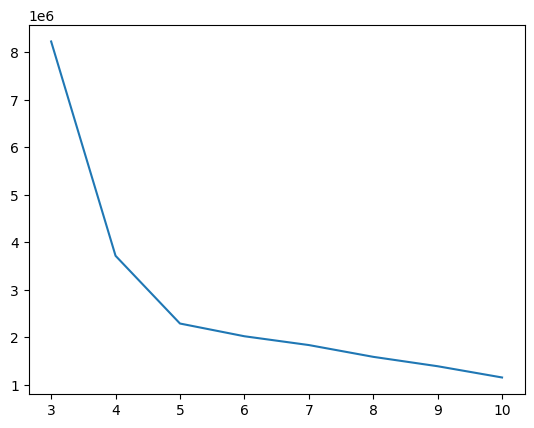

In [48]:
# testing different cluster numbers
cluster_num = list(map(int, range(3, 11)))
inertias = []
for n in cluster_num:
    kmean = KMeans(n_clusters=n, random_state=random_seed)
    kmean.fit(X)
    kmean.predict(X)
    inertias.append(kmean.inertia_)
plt.plot(cluster_num, inertias)

5 is chosen for optimal clustering and computation resource

In [49]:
kmean = KMeans(n_clusters=5, random_state=random_seed)
kmean.fit(X)
labels = kmean.predict(X)
df_subscribed['cluster_numerical'] = labels

In [50]:
df_result = pd.DataFrame(df_subscribed.groupby(['cluster_numerical'])[numerical_features].mean())
df_result['total'] = df_subscribed.groupby(['cluster_numerical'])['cluster_numerical'].count()
df_result

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,total
cluster_numerical,,,,,,,,,,,,
0,39.086183,5.158687,3.014364,1.937073,999.000000,0.192202,-2.146854,92.846554,-43.605267,1.284798,5091.879138,1462
1,43.345946,7.866216,3.024324,1.701351,6.071622,1.860811,-2.028649,93.657923,-37.205270,0.794147,4996.495946,740
2,39.517216,7.360778,3.047156,2.571108,999.000000,0.017964,1.087799,93.807337,-39.934955,4.821174,5215.860105,1336
3,44.164571,8.042286,2.981714,1.833143,999.000000,0.369143,-2.270629,93.430555,-35.437943,0.772495,5001.685371,875
4,40.431718,6.233480,3.017621,1.718062,5.396476,1.237885,-2.422026,92.676159,-39.561674,1.181859,5086.960793,227


_Interpretation of clusters form:_<br>
__Cluster 0 and 2 have the higher proportion than others__, where:<br>
<br> 0: not contacted in the last campaign
<br> 1: last contacted not far ago in the last campaign (1-2 times)
<br> 2: not contacted in the last campaign
<br> 3: not contacted in the last campaign
<br> 4: last contacted not far ago in the last campaign (1-2 times)

<br> __Conclusion: Customers who aren't contacted in the last campaign with age around 39 and higher euribor rate (3 month) are more likely to subscribe__

In [51]:
from scipy.spatial.distance import euclidean

# for cluster_index in df_result.index: # for each cluster in the subscribed customer
#     seed = df_result[cluster_index:cluster_index+1]
#     distance_metric = []
#     column_name = 'cluster_' + str(cluster_index) + '_dist'
#     for i in range(df_not_subscribed.shape[0]): # calculate the distance between each row and the cluster's features mean
#         distance = euclidean(df_not_subscribed[numerical_features][i:i+1].values.flatten(),
#                              seed[numerical_features].values.flatten())
#         distance_metric.append(distance)
#     df_not_subscribed[column_name] = distance_metric

In [52]:
# df_not_subscribed.to_csv('unsubscribe_customers_vs_distance_to_subscribed_clusters.csv')
# df_not_subscribed = pd.read_csv('unsubscribe_customers_vs_distance_to_subscribed_clusters.csv')
# df_not_subscribed = df_not_subscribed.drop(['Unnamed: 0'], axis=1)

In [53]:
# top 10 customer closest to the 1st cluster of subscribed customer
# df_not_subscribed.sort_values(['cluster_0_dist'], ascending=True).head(10)

In [54]:
# top 10 customer closest to the 2nd cluster of subscribed customer
# df_not_subscribed.sort_values(['cluster_1_dist'], ascending=True).head(10)

In [55]:
# top 10 customer closest to the 3rd cluster of subscribed customer
# df_not_subscribed.sort_values(['cluster_2_dist'], ascending=True).head(10)

In [56]:
# top 10 customer closest to the 4th cluster of subscribed customer
# df_not_subscribed.sort_values(['cluster_3_dist'], ascending=True).head(10)

In [57]:
# top 10 customer closest to the 5th cluster of subscribed customer
# df_not_subscribed.sort_values(['cluster_4_dist'], ascending=True).head(10)

__find clusters of subscribed customer based on basic categorical features__

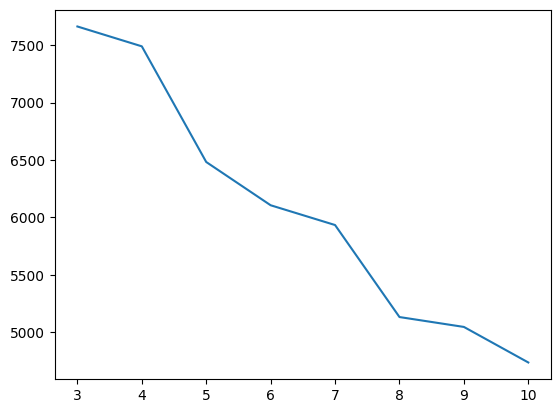

In [58]:
X = df_subscribed[basic_categories_list]

# testing different cluster numbers
cluster_num = list(map(int, range(3, 11)))
inertias = []
for n in cluster_num:
    kmean = KMeans(n_clusters=n, random_state=random_seed)
    kmean.fit(X)
    kmean.predict(X)
    inertias.append(kmean.inertia_)
plt.plot(cluster_num, inertias)

In [59]:
kmean = KMeans(n_clusters=8, random_state=random_seed)
kmean.fit(X)
labels = kmean.predict(X)
df_subscribed['cluster_category_basic'] = labels

In [60]:
df_result = pd.DataFrame(df_subscribed.groupby(['cluster_category_basic'])[basic_categories_list].sum())
df_result['total'] = df_result['marital_divorced'] + df_result['marital_married'] + df_result['marital_single'] + df_result['marital_unknown']
df_result

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,total
cluster_category_basic,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,86,12,9,29,350,2,22,0,0,7,15,98,428,4,2,185,140,3,0,4,55,63,82,532
1,439,7,19,8,88,3,53,19,31,140,25,10,153,0,683,6,0,0,0,0,0,0,840,2,842
2,419,2,47,9,169,0,43,7,4,85,14,1,0,800,0,0,0,7,0,0,0,0,767,26,800
3,10,142,6,51,5,0,3,6,0,9,13,4,35,199,14,1,230,0,0,0,0,0,0,19,249
4,33,41,9,11,8,2,20,10,3,367,20,1,55,332,138,0,0,5,0,0,0,501,0,19,525
5,27,240,12,3,11,16,18,21,0,37,26,1,28,298,84,2,0,0,412,0,0,0,0,0,412
6,206,74,5,5,3,2,2,110,235,33,17,5,0,0,697,0,13,36,58,448,0,39,0,103,697
7,218,46,14,10,15,61,8,128,2,59,22,0,107,475,0,1,0,0,0,583,0,0,0,0,583


_Interpretation of clusters form:_<br>
__Cluster 1 and 2 have higher proportion than other__, where:<br>
<br> 0: **married retirees**        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;highest education **basic 4 or 6 years**
<br> 1: **single admins**           &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;got **university degree**
<br> 2: **married admins**          &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;got **university degree**
<br> 3: **married blue-collars**    &ensp;&ensp;&ensp;&ensp;highest education **basic 4 years**
<br> 4: **married technicians**     &ensp;&ensp;&ensp;&ensp;&ensp;highest education **professional course**
<br> 5: **married blue-collars**    &ensp;&ensp;&ensp;&ensp;highest education **basic 9 years**
<br> 6: **single admins/students**  &ensp;highest education **high school**
<br> 7: **married admins**          &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;highest education **high school**

<br>__Conclusion: Admins with university degree have higher tendency to subscribe__

__find clusters of subscribed customer based on financial categorical features__

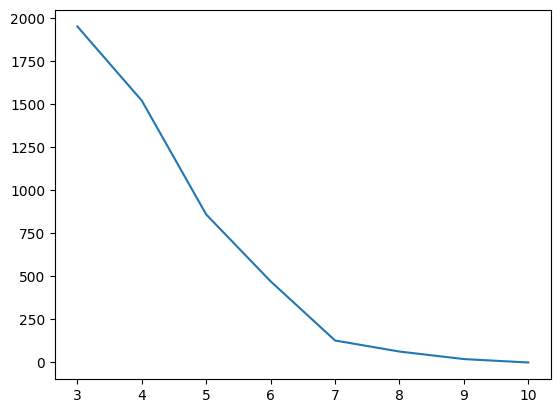

In [61]:
X = df_subscribed[finance_categories_list]

# testing different cluster numbers
cluster_num = list(map(int, range(3, 11)))
inertias = []
for n in cluster_num:
    kmean = KMeans(n_clusters=n, random_state=random_seed)
    kmean.fit(X)
    kmean.predict(X)
    inertias.append(kmean.inertia_)
plt.plot(cluster_num, inertias)

In [62]:
kmean = KMeans(n_clusters=7, random_state=random_seed)
kmean.fit(X)
labels = kmean.predict(X)
df_subscribed['cluster_category_finance'] = labels

df_result = pd.DataFrame(df_subscribed.groupby(['cluster_category_finance'])[finance_categories_list].sum())
df_result['total'] = df_result['loan_no'] + df_result['loan_unknown'] + df_result['loan_yes']
df_result

,credit_no,credit_unknown,credit_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,total
cluster_category_finance,,,,,,,,,,
0,1909,0,0,0,0,1909,1909,0,0,1909
1,1569,0,0,1569,0,0,1569,0,0,1569
2,0,207,0,207,0,0,183,0,24,207
3,250,0,0,250,0,0,0,0,250,250
4,373,36,0,0,0,409,0,0,409,409
5,96,11,0,0,107,0,0,107,0,107
6,0,189,0,0,0,189,189,0,0,189


_Interpretation of clusters form:_<br>
__Cluster 0 and 1 have the highest proportion significantly__, where:<br>
<br> 0: __no__ credit   &ensp;&ensp;__has__ housing loan    &ensp;&ensp;__no__ personal loan
<br> 1: __no__ credit   &ensp;&ensp;__no__ housing loan     &ensp;&ensp;__no__ personal loan
<br> 2: _unknown_       &ensp;&ensp;__no__ housing loan     &ensp;&ensp;__no__ personal loan
<br> 3: __no__ credit   &ensp;&ensp;__no__ housing loan     &ensp;&ensp;__has__ personal loan
<br> 4: __no__ credit   &ensp;&ensp;__has__ housing loan    &ensp;&ensp;__has__ personal loan
<br> 5: __no__ credit   &ensp;&ensp;_unknown_               &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;_unknown_
<br> 6: _unknown_       &ensp;&ensp;__has__ housing loan    &ensp;&ensp;__no__ personal loan
<br><br>__Conclusion: most subscribed customers have no credit and personal loan__

Getting the unsubscribed customers with similar profile with the above insights

In [72]:
# seed
potential_profile = {'pdays': 999,
                     'job': 'admin.',
                     'education': 'university.degree',
                     'credit': 'no',
                     'loan': 'no'} # later sort desc by euribor rate and asc by age
df_not_subscribed = df_back_up[df_back_up.y == 'no']
df_potential = df_not_subscribed[(df_not_subscribed['pdays'] == 999) &
                                 (df_not_subscribed['job'] == 'admin.') &
                                 (df_not_subscribed['education'] == 'university.degree') &
                                 (df_not_subscribed['credit'] == 'no') &
                                 (df_not_subscribed['loan'] == 'no')]
df_potential.sort_values(['euribor3m', 'age'], ascending=[False, True]).head(10)

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18848,30,admin.,married,university.degree,no,no,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18849,30,admin.,married,university.degree,no,no,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18875,30,admin.,single,university.degree,no,yes,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18977,30,admin.,single,university.degree,no,yes,no,cellular,8,1,2,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18834,31,admin.,single,university.degree,no,yes,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18885,31,admin.,married,university.degree,no,yes,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18883,32,admin.,single,university.degree,no,no,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18842,33,admin.,single,university.degree,no,no,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18868,33,admin.,divorced,university.degree,no,yes,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no
18910,34,admin.,single,university.degree,no,yes,no,cellular,8,1,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no


In [73]:
df_potential.shape

(3446, 20)